In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import AutoTokenizer
import huggingface_hub


In [ ]:
TRAIN_CSV = '/content/train.csv'
VAL_CSV = '/content/val.csv'
TEST_CSV = '/content/test.csv'
BASE_MODEL = 'meta-llama/Llama-3.2-1B-Instruct'

In [ ]:
# WILL NEED PERMISSION FROM META ON HF
# AND API KEY TO LOGIN
huggingface_hub.login()

In [ ]:
train_df = pd.read_csv(TRAIN_CSV)
val_df = pd.read_csv(VAL_CSV)
test_df = pd.read_csv(TEST_CSV)
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL, use_fast=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [ ]:
def count_tokens(row):
  input_token_ids = tokenizer(row['model_input'],
                              add_special_tokens = True,
                              return_attention_mask = False)['input_ids']
  return len(input_token_ids)
df['num_tokens'] = df.apply(count_tokens, axis = 1)
print('Example input - ')
print(df['model_input'][9])
print('')
print(f'Num of tokens = {df["num_tokens"][9]}')
print('')
df.head(7)

Example input - 
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 03 May 2025

Use the information to answer the question<|eot_id|><|start_header_id|>user<|end_header_id|>

What role does Jeffrey Burns, M.D., M.S. hold at the University of Kansas Health System?

Information:

```
Jeffrey Burns, M.D., M.S. -Professor, Neurology -Director, Clinical And Translational Science Unit -Director, Memory Care Clinic, University of Kansas Health System
```<|eot_id|><|start_header_id|>assistant<|end_header_id|>

He is the Director of the Clinical And Translational Science Unit and the Director of the Memory Care Clinic.<|eot_id|>

Num of tokens = 130



,question,answer,context,source,model_input,num_tokens,subdomain
0,What role do faculty play in the educational e...,Faculty are expert and contribute to innovativ...,"Chemical Engineering World renowned faculty, s...",http://cpe.engr.ku.edu/research-centers,<|begin_of_text|><|start_header_id|>system<|en...,101,cpe.engr.ku.edu
1,In which fields does Michael Branicky apply hi...,Michael Branicky applies his research in field...,These systems are applied to a wide range of a...,https://engr.ku.edu/news/article/engineering-p...,<|begin_of_text|><|start_header_id|>system<|en...,110,engr.ku.edu
2,What aspects of signal processing are included...,Aspects include design and implementation of d...,Signals and Systems includes signal processing...,https://eecs.ku.edu/phd-qualifying-exam-topics,<|begin_of_text|><|start_header_id|>system<|en...,144,eecs.ku.edu
3,What kind of communication role does Cody Howa...,He communicates news of School of Engineering ...,Communicates news of School of Engineering ach...,https://engr.ku.edu/people/cody-howard,<|begin_of_text|><|start_header_id|>system<|en...,90,engr.ku.edu
4,What specific classes are allowed to have alte...,Alternate examination times for MATH 2 and MAT...,Alternate examination times for MATH 2 and MAT...,https://registrar.ku.edu/fall-2025-final-exam-...,<|begin_of_text|><|start_header_id|>system<|en...,130,registrar.ku.edu
5,How much total scholarship money is awarded to...,"$12,000 in scholarships will be awarded to the...","A total of $12,000 in scholarships will be awa...",https://engr.ku.edu/high-school-design-competi...,<|begin_of_text|><|start_header_id|>system<|en...,108,engr.ku.edu
6,What is the main reason the University of Kans...,The University of Kansas does not write an inv...,The University of Kansas will not write an inv...,https://iss.ku.edu/invitation-letter-family,<|begin_of_text|><|start_header_id|>system<|en...,117,iss.ku.edu


In [ ]:
print('')
print('================== SUMMARY ==================')
print(f'Total num of rows = \n{df.count()}')
print(f'Total num of training rows = \n{train_df.count()}')
print(f'Total num of validation rows = \n{val_df.count()}')
print(f'Total num of test rows = \n{test_df.count()}')
print('')
print(f'Num of empty rows = \n{df.isnull().sum()}')
print('')
print(f'Duplicate rows = {df.duplicated().sum()}')
print(f'Maximum num of words in questions = {df["question"].apply(lambda x: len(str(x).split())).max()}')
print(f'Maximum length of questions = {df["question"].str.len().max()}')
print(f'Minimum num of words in questions = {df["question"].apply(lambda x: len(str(x).split())).min()}')
print(f'Minimum length of questions = {df["question"].str.len().min()}')
print(f'Average num of words in questions = {df["question"].apply(lambda x: len(str(x).split())).mean()}')
print(f'Average length of questions = {df["question"].str.len().mean()}')
print('')
print(f'Maximum num of words in answers = {df["answer"].apply(lambda x: len(str(x).split())).max()}')
print(f'Maximum length of answers = {df["answer"].str.len().max()}')
print(f'Minimum num of words in answers = {df["answer"].apply(lambda x: len(str(x).split())).min()}')
print(f'Minimum length of answers = {df["answer"].str.len().min()}')
print(f'Average num of words in answers = {df["answer"].apply(lambda x: len(str(x).split())).mean()}')
print(f'Average length of answers = {df["answer"].str.len().mean()}')
print('')
print(f'Maximum num of words in context = {df["context"].apply(lambda x: len(str(x).split())).max()}')
print(f'Maximum length of context = {df["context"].str.len().max()}')
print(f'Minimum num of words in context = {df["context"].apply(lambda x: len(str(x).split())).min()}')
print(f'Minimum length of context = {df["context"].str.len().min()}')
print(f'Average num of words in context = {df["context"].apply(lambda x: len(str(x).split())).mean()}')
print(f'Average length of context = {df["context"].str.len().mean()}')
print('')
print(f'Total num of tokens = {df["num_tokens"].sum()}')
print(f'Maximum num of tokens = {df["num_tokens"].max()}')
print(f'Minimum num of tokens = {df["num_tokens"].min()}')
print(f'Average num of tokens = {round(df["num_tokens"].mean())}')
print('=============================================')
print('')


================== SUMMARY ==================
Total num of rows = 
question       4380
answer         4380
context        4380
source         4380
model_input    4380
num_tokens     4380
subdomain      4380
dtype: int64
Total num of training rows = 
question       3066
answer         3066
context        3066
source         3066
model_input    3066
num_tokens     3066
subdomain      3066
dtype: int64
Total num of validation rows = 
question       438
answer         438
context        438
source         438
model_input    438
num_tokens     438
subdomain      438
dtype: int64
Total num of test rows = 
question       876
answer         876
context        876
source         876
model_input    876
num_tokens     876
subdomain      876
dtype: int64

Num of empty rows = 
question       0
answer         0
context        0
source         0
model_input    0
num_tokens     0
subdomain      0
dtype: int64

Duplicate rows = 0
Maximum num of words in questions = 26
Maximum length of questions = 183

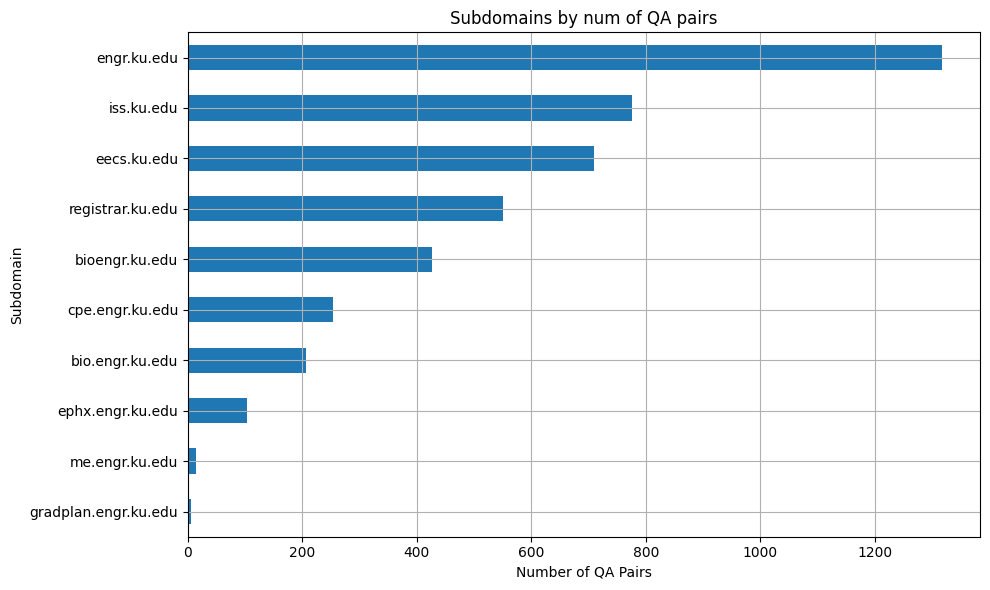

In [ ]:
top_n = 10
subdomain_counts = df['subdomain'].value_counts()
subdomain_counts.head(top_n).plot(kind="barh", figsize=(10, 6))
plt.title("Subdomains by num of QA pairs")
plt.xlabel("Number of QA Pairs")
plt.ylabel("Subdomain")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

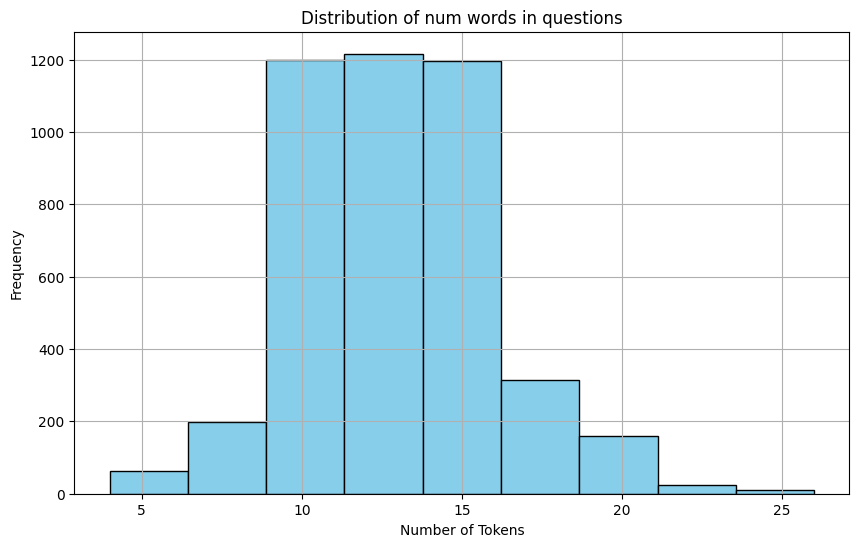

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df["question"].apply(lambda x: len(str(x).split())), bins=9, color='skyblue', edgecolor='black')
plt.title("Distribution of num words in questions")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

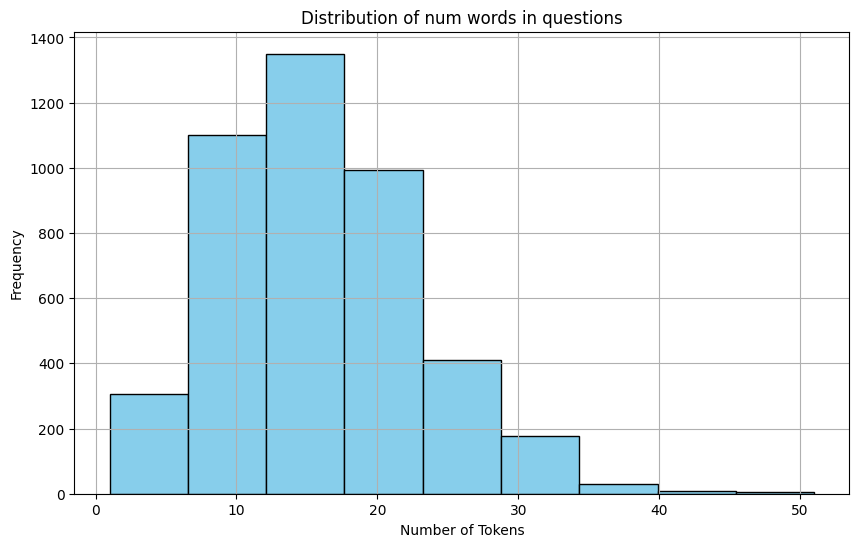

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df["answer"].apply(lambda x: len(str(x).split())), bins=9, color='skyblue', edgecolor='black')
plt.title("Distribution of num words in questions")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

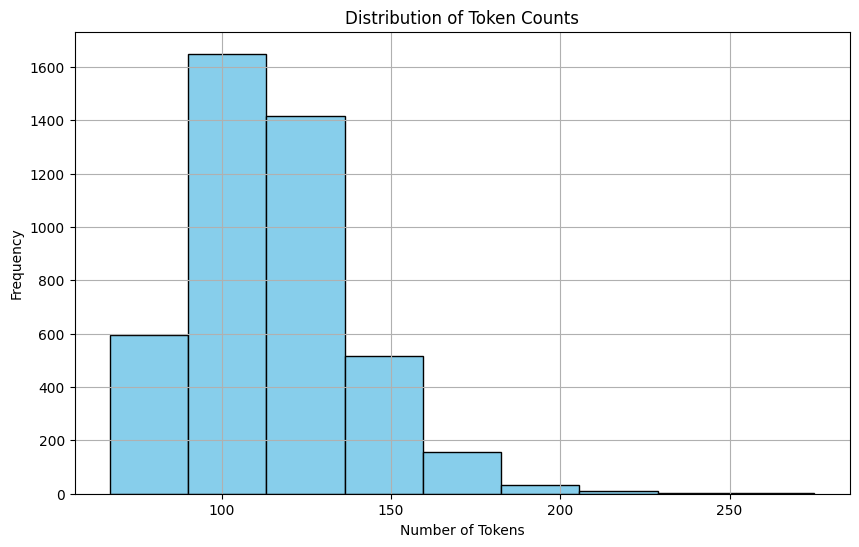

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df["num_tokens"], bins=9, color='skyblue', edgecolor='black')
plt.title("Distribution of Token Counts")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

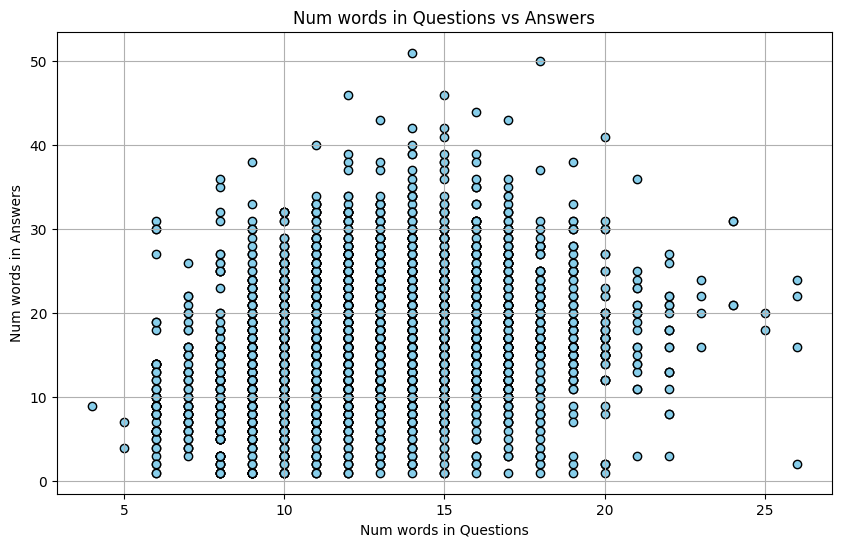

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df["question"].apply(lambda x: len(str(x).split())), df["answer"].apply(lambda x: len(str(x).split())), color='skyblue', edgecolor='black')
plt.title("Num words in Questions vs Answers")
plt.xlabel("Num words in Questions")
plt.ylabel("Num words in Answers")
plt.grid(True)
plt.show()

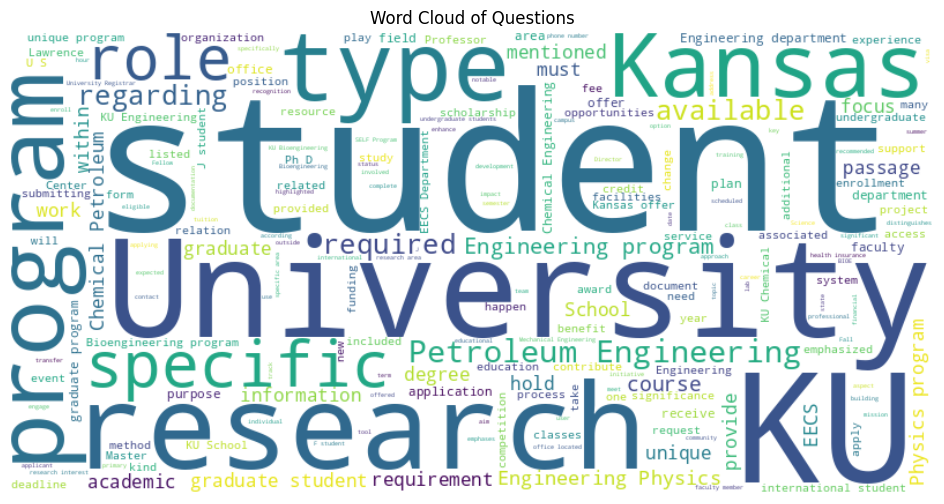

In [ ]:
qs = ' '.join(str(word) for word in df['question'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(qs)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Questions")
plt.show()

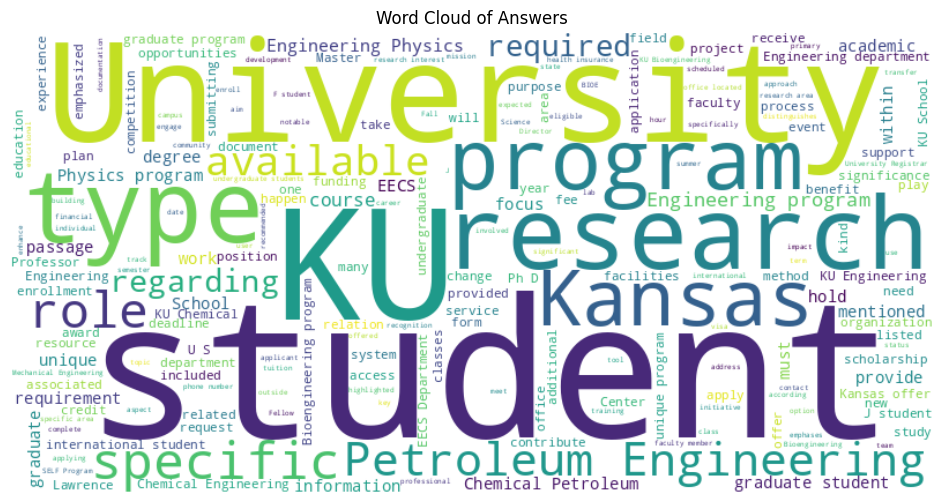

In [ ]:
ans = ' '.join(str(word) for word in df['question'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ans)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Answers")
plt.show()